In the previous Project 1, I analyzed data from the 2019 Survey of Consumer Finances (SCF), focusing on households that have either been denied credit or expressed fear of credit denial. In this 2nd part, I will try to develop a model to segment these households into distinct clusters and investigate the differences among them.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


As usual, there is need to start by importing data into the project. In the previous project, I worked with a subset of the larger SCF dataset known as "TURNFEAR." I will begin by using that dataset again.

In [2]:
def wrangle(filepath):
    """
    Reads a CSV file into a DataFrame, filters the data to include only rows
    where households have been turned down for credit or feared being denied credit,
    and returns the subset DataFrame.
    
    Parameters:
    filepath (str): Path to the CSV file.
    
    Returns:
    pd.DataFrame: Filtered DataFrame containing only relevant rows.
    """
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)
    
    # Create a boolean mask to filter rows where 'TURNFEAR' column value is 1
    # Assuming 'TURNFEAR' is a numeric column where 1 indicates the condition of interest
    mask = df["TURNFEAR"] == 1
    
    # Apply the mask to the DataFrame to get only the relevant rows
    df = df[mask]
    
    return df


In [4]:
df = wrangle("Survey of Consumer Finances.csv")

print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (4623, 352)


,Unnamed: 0,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,5,2,21,3790.476607,1,50,3,8,2,1,...,1,2,1,2,1,1,4,4,2,2
6,6,2,22,3798.868505,1,50,3,8,2,1,...,1,2,1,2,1,1,4,3,2,2
7,7,2,23,3799.468393,1,50,3,8,2,1,...,1,2,1,2,1,1,4,4,2,2
8,8,2,24,3788.076005,1,50,3,8,2,1,...,1,2,1,2,1,1,4,4,2,2
9,9,2,25,3793.066589,1,50,3,8,2,1,...,1,2,1,2,1,1,4,4,2,2


# Exploring the data

We looked at a lot of different features of the `"TURNFEAR"` subset in the previous project and the last thing we looked at was the relationship between house value and debt. 
I will create the graph again.

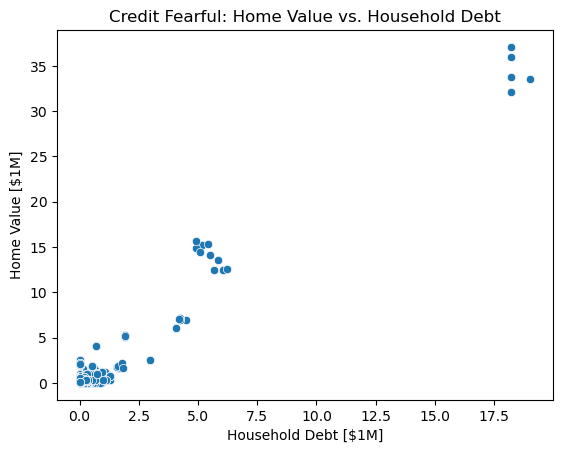

In [5]:
# Plot "HOUSES" vs "DEBT"
sns.scatterplot(x=df["DEBT"] / 1e6, y=df["HOUSES"] / 1e6)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Now, we will get a little deeper into it.

# Split the data

This is an unsupervised learning method, so I won't be needing a target vector or test set(y)

### Methodology

For the clustering analysis, I will employ k-means clustering, a popular method for partitioning data into distinct groups. K-means works by initializing k cluster centroids and iteratively refining these centroids to minimize the within-cluster variance. The algorithm assigns each data point to the nearest centroid, recalculates centroids based on these assignments, and repeats until convergence.

In [14]:
type(df.HOUSES.iloc[23])

numpy.float64

In [16]:
# Select relevant columns from the DataFrame for clustering
X = df[["DEBT", "HOUSES"]]

#convert houses column to 'int' type as there can't be fractional houses
df.HOUSES = df.HOUSES.astype(int)

# Print the type of the variable X to confirm it's a DataFrame
print("X type:", type(X))

# Print the shape of the DataFrame X to show its dimensions (rows, columns)
print("X shape:", X.shape)

# Display the first few rows of the DataFrame X to inspect the data
X.head()


X type: <class 'pandas.core.frame.DataFrame'>
X shape: (4623, 2)


,DEBT,HOUSES
5,12200.0,0
6,12600.0,0
7,15300.0,0
8,14100.0,0
9,15400.0,0


# BUILD MODEL

I will choose a cluster number of 3 for now

In [21]:
# Build model
model = KMeans(n_clusters=3, random_state=42)
print("model type:", type(model))

# Fit model to data
model.fit(X)

model type: <class 'sklearn.cluster._kmeans.KMeans'>


C:\Users\DELL\anaconda3\envs\SQL_Create\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [42]:
# Get the counts of each cluster label
value_labels = pd.Series(model.labels_).value_counts()

# Print the type of the 'labels' object to confirm it is a Series
print("labels type:", type(value_labels))

# Print the shape of the 'labels' Series to show its dimensions (number of unique labels)
print("labels shape:", value_labels.shape)

# Display the first 10 rows of the 'labels' Series to inspect the counts
print(value_labels[:10])

labels type: <class 'pandas.core.series.Series'>
labels shape: (3,)
0    4603
2      15
1       5
Name: count, dtype: int64


In [43]:
# Extract cluster labels from the fitted model
labels = model.labels_

# Print the type of the 'labels' object to confirm it is a numpy array or similar
print("labels type:", type(labels))

# Print the shape of the 'labels' array to show its dimensions (number of data points,)
print("labels shape:", labels.shape)

# Display the first 10 cluster labels to inspect the initial values
print(labels[:10])


labels type: <class 'numpy.ndarray'>
labels shape: (4623,)
[0 0 0 0 0 0 0 0 0 0]


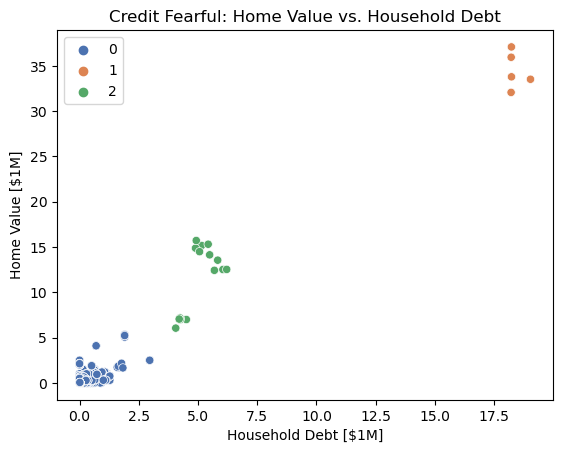

In [53]:
# Plot "HOUSES" vs "DEBT" with hue representing the cluster labels
sns.scatterplot(
    x=df["DEBT"] / 1e6,           # X-axis: Household Debt, scaled to millions for readability
    y=df["HOUSES"] / 1e6,         # Y-axis: Home Value, scaled to millions for readability
    hue=labels,                   # Color points by cluster labels
    palette="deep"                # Use the 'deep' color palette for distinguishing clusters
)

# Label the x-axis
plt.xlabel("Household Debt [$1M]")

# Label the y-axis
plt.ylabel("Home Value [$1M]")

# Set the title of the plot
plt.title("Credit Fearful: Home Value vs. Household Debt")

# Display the plot
plt.show()


Nice! Each cluster has its own color. The centroids are still missing, so let's pull those out.

In [54]:
# Extract cluster centroids from the fitted model
centroids = model.cluster_centers_

# Print the type of the 'centroids' object to confirm it is a numpy array
print("centroids type:", type(centroids))

# Print the shape of the 'centroids' array to show its dimensions (number of clusters, number of features)
print("centroids shape:", centroids.shape)

# Display the cluster centroids to inspect their values
print(centroids)


centroids type: <class 'numpy.ndarray'>
centroids shape: (3, 2)
[[   91017.57766674   116150.29328698]
 [18384100.         34484000.        ]
 [ 5065800.         11666666.66666667]]


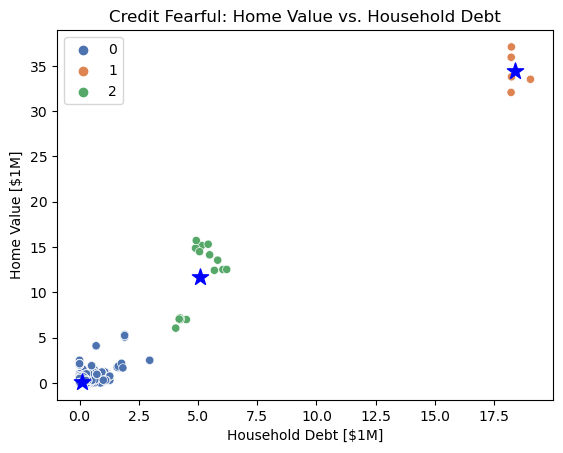

In [56]:
# Plot "HOUSES" vs "DEBT" with hue representing the cluster labels
sns.scatterplot(
    x=df["DEBT"] / 1e6,           # X-axis: Household Debt, scaled to millions for readability
    y=df["HOUSES"] / 1e6,         # Y-axis: Home Value, scaled to millions for readability
    hue=labels,                   # Color points by cluster labels
    palette="deep"                # Use the 'deep' color palette for distinguishing clusters
)

# Add cluster centroids to the scatter plot
plt.scatter(
    x=centroids[:, 0] / 1e6,     # X-coordinates of centroids, scaled to millions
    y=centroids[:, 1] / 1e6,     # Y-coordinates of centroids, scaled to millions
    color="blue",                # Color of the centroids
    marker="*",                  # Shape of the centroid markers
    s=150                        # Size of the centroid markers
)

# Label the x-axis
plt.xlabel("Household Debt [$1M]")

# Label the y-axis
plt.ylabel("Home Value [$1M]")

# Set the title of the plot
plt.title("Credit Fearful: Home Value vs. Household Debt")

# Display the plot
plt.show()


The graph looks promising, but let's hold off on celebrating just yet. While it seems like the clusters are well-defined, it’s important for us to get a numerical evaluation to confirm everything’s on track. Although our data is relatively straightforward, a more complex dataset would definitely need a thorough check to ensure accuracy.

To assess our clusters, we’ll start with inertia, which measures how tightly the points are grouped within each cluster. This will help us understand how well-defined our clusters really are.

In [57]:
# Calculate the inertia of the KMeans model
inertia = model.inertia_

# Print the type of the 'inertia' object to confirm it is a float
print("inertia type:", type(inertia))

# Print the inertia value for the model with 3 clusters
print("Inertia (3 clusters):", inertia)


inertia type: <class 'float'>
Inertia (3 clusters): 939554010797059.4


A lower inertia value indicates better clustering, with 0 being the ideal value. However, our inertia score is quite high, which might seem concerning. But this doesn’t automatically mean our model is poor. Inertia is a measure of distance, similar to mean absolute error, and it depends on the units of the features we're using. Since "DEBT" and "HOUSES" are measured in tens of millions of dollars, a high inertia score is expected.

To get a clearer picture of how well our clusters are defined, we’ll use the silhouette score. Unlike inertia, the silhouette score measures how well-separated the clusters are from each other. It ranges from -1 (indicating poor clustering) to 1 (indicating excellent clustering), making it easier to interpret and assess the quality of our clustering model.

In [58]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clustering model
ss = silhouette_score(X, model.labels_)

# Print the type of the 'ss' object to confirm it is a float
print("ss type:", type(ss))

# Print the silhouette score for the model with 3 clusters
print("Silhouette Score (3 clusters):", ss)


ss type: <class 'numpy.float64'>
Silhouette Score (3 clusters): 0.9768842462944348


Outstanding! it is obvious 0.976 is pretty close to 1, so our model has done a good job at identifying 3 clusters that are far away from each other.

It’s crucial to keep in mind that the performance metrics we’ve evaluated are influenced by the number of clusters we specified for our model. In unsupervised learning, the number of clusters is a hyperparameter we set before training. So, what if we adjust the number of clusters? Could it improve our model's performance? Let’s experiment and see!

-----------------------------------------------------------------------------------------------------------------------

I will create a `for` loop to build and train a K-Means model where `n_clusters` ranges from 2 to 12 (inclusive). Each time a model is trained, the inertia is calculated and added to the list `inertia_errors`, then the silhouette score is calculated and added to the list `silhouette_scores`.

In [61]:
# Define the range of cluster numbers to evaluate
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

# Loop through each number of clusters
for k in n_clusters:
    # Build the KMeans model with k clusters
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    # Train the model on the data
    model.fit(X)
    # Calculate the inertia for the current model
    inertia = model.inertia_
    # Append the inertia value to the list
    inertia_errors.append(inertia)
    # Calculate the silhouette score for the current model
    ss = silhouette_score(X, model.labels_)
    # Append the silhouette score to the list
    silhouette_scores.append(ss)

# Print the type and length of the inertia errors list
print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
# Print the list of inertia errors
print("Inertia:", inertia_errors)

print()

# Print the type and length of the silhouette scores list
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
# Print the list of silhouette scores
print("Silhouette Scores:", silhouette_scores)


inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [3018038313336857.5, 939554010797059.4, 546098841715646.25, 309310386410913.3, 235243397481784.3, 182225729179703.53, 150670779013790.4, 114321995931021.89, 100340259483919.02, 86229997033602.88, 74757234072100.36]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [0.9855099957519555, 0.9768842462944348, 0.9490311483406091, 0.839330043242819, 0.7287406719898627, 0.726989114305748, 0.7263840026889208, 0.7335125606476427, 0.692157992955073, 0.6949309528556856, 0.6951831031001252]


Now that we have both performance metrics for several different settings of `n_clusters`, let's make some line plots to see the relationship between the number of clusters in a model and its inertia and silhouette scores.

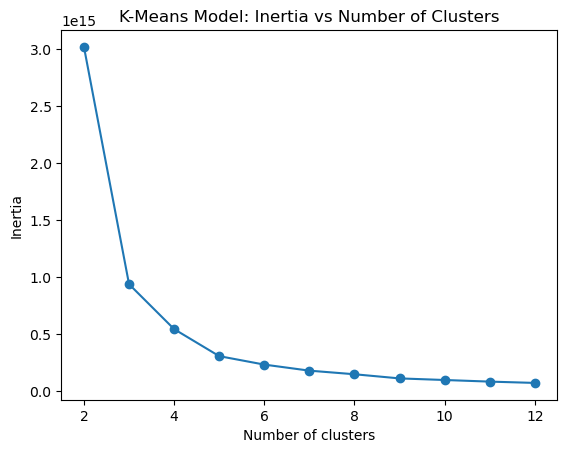

In [62]:
import matplotlib.pyplot as plt

# Plot inertia errors by the number of clusters
plt.plot(n_clusters, inertia_errors, marker='o')

# Label the x-axis
plt.xlabel("Number of clusters")

# Label the y-axis
plt.ylabel("Inertia")

# Set the title of the plot
plt.title("K-Means Model: Inertia vs Number of Clusters")

# Display the plot
plt.show()

What we observe is that as the number of clusters increases, inertia decreases. Technically, if we set the number of clusters to match the number of observations (4,623 clusters for X), inertia would be 0, but such a high number of clusters isn't practical or useful.

The key to choosing the right number of clusters is to identify the "elbow" in the plot. This is where the reduction in inertia starts to slow down and the curve flattens out. From our plot, it looks like 4 or 5 clusters might be the optimal choice.

Next, let’s take a look at the silhouette scores to further evaluate our clustering options.

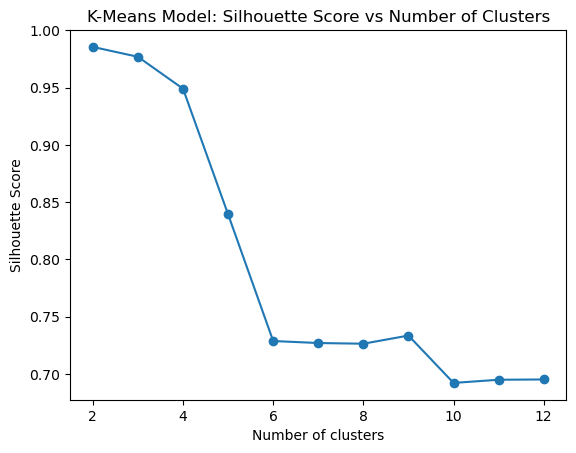

In [63]:
import matplotlib.pyplot as plt

# Plot silhouette scores by the number of clusters
plt.plot(n_clusters, silhouette_scores, marker='o')

# Label the x-axis
plt.xlabel("Number of clusters")

# Label the y-axis
plt.ylabel("Silhouette Score")

# Set the title of the plot
plt.title("K-Means Model: Silhouette Score vs Number of Clusters")

# Display the plot
plt.show()


# Model Evaluation

The effectiveness of the clustering model was assessed using various metrics and visualizations:

1. Elbow Method (Inertia): To determine the optimal number of clusters (k), we used the elbow method, which plots the within-cluster sum of squares (WCSS) against the number of clusters. The point where the decrease in WCSS starts to slow down (forming an “elbow”) suggests the optimal k.

2. Silhouette Score: This metric measures how similar each data point is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

Note that, in contrast to our inertia plot, bigger is better. So we're not looking for a "bend in the elbow" but rather a number of clusters for which the silhouette score still remains high. We can see that silhouette score drops drastically beyond 4 clusters. Given this and what we saw in the inertia plot, it looks like the optimal number of clusters is 4. 

Now that we've decided on the final number of clusters, let's build a final model.

In [66]:
# Build model
final_model = KMeans(n_clusters=4, n_init=10, random_state=42)
print("final_model type:", type(final_model))

# Fit model to data
final_model.fit(X)


final_model type: <class 'sklearn.cluster._kmeans.KMeans'>


KMeans(n_clusters=4, n_init=10, random_state=42)

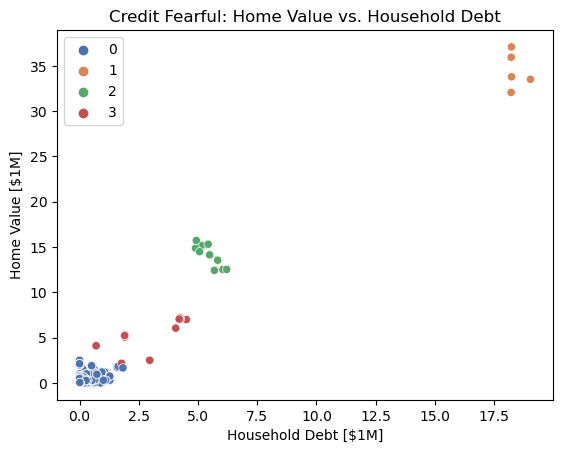

In [70]:
# Plot "HOUSES" vs "DEBT" with final_model labels
sns.scatterplot(
    x=df["DEBT"] / 1e6,               # X-axis: Household Debt, scaled to millions for readability
    y=df["HOUSES"] / 1e6,             # Y-axis: Home Value, scaled to millions for readability
    hue=final_model.labels_,          # Color points by the cluster labels from the final model
    palette="deep"                    # Use the 'deep' color palette for distinguishing clusters
)

# Label the x-axis
plt.xlabel("Household Debt [$1M]")

# Label the y-axis
plt.ylabel("Home Value [$1M]")

# Set the title of the plot
plt.title("Credit Fearful: Home Value vs. Household Debt")

# Display the plot
plt.show()


Nice! We can see all four of our clusters, each differentiated from the rest by color.

We're going to make one more visualization, converting the cluster analysis we just did to something a little more actionable: a side-by-side bar chart. In order to do that, we need to put our clustered data into a DataFrame.

In [72]:
final_model.cluster_centers_

array([[   84886.28951384,   103187.22476563],
       [18384100.        , 34484000.        ],
       [ 5472800.        , 14074000.        ],
       [ 2420928.57142857,  4551428.57142857]])

In [71]:
# Compute the mean values of features for each cluster
xgb = X.groupby(final_model.labels_).mean()

# Print the type of xgb
print("xgb type:", type(xgb))

# Print the shape of xgb
print("xgb shape:", xgb.shape)

# Print the content of xgb
print(xgb)


xgb type: <class 'pandas.core.frame.DataFrame'>
xgb shape: (4, 2)
           DEBT        HOUSES
0  8.488629e+04  1.031872e+05
1  1.838410e+07  3.448400e+07
2  5.472800e+06  1.407400e+07
3  2.420929e+06  4.551429e+06


To create a side-by-side bar chart showing the mean "DEBT" and "HOUSES" values for each cluster, follow these steps:

1. Divide the values in xgb by 1 million for readability.
2. Plot the data using a bar chart with side-by-side bars for "DEBT" and "HOUSES".
3. Label the axes and add a title for clarity.

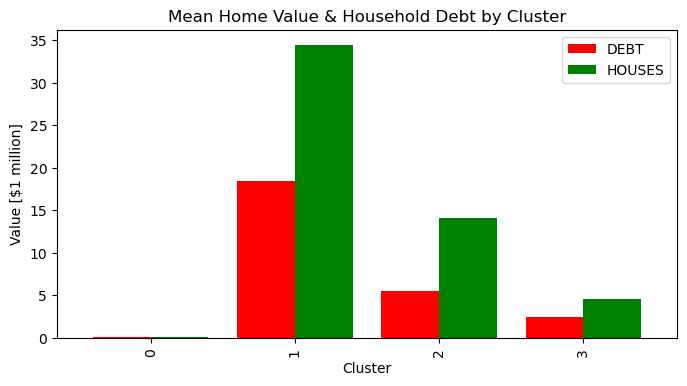

In [81]:
# Divide the values in xgb by 1 million for readability
xgb_million = xgb / 1e6

# Create a side-by-side bar chart
xgb_million.plot(
    kind='bar',
    figsize=(8, 4),            # Optional: adjust the figure size for better readability
    width=0.8,                 # Width of the bars,
    color=['red', 'green'],    # Colors for "DEBT" and "HOUSES"
    title="Mean Home Value & Household Debt by Cluster"
)

# Label the x-axis
plt.xlabel("Cluster")

# Label the y-axis
plt.ylabel("Value [$1 million]")

# Show the plot
plt.show()


In this plot, we see our four clusters distributed along the x-axis, with home values and household debt on the y-axis.

## Key Insights:

Home Values:

    Cluster 0: Households with small to moderate home values.
    Cluster 1: Households with extremely high home values.
    Clusters 2 and 3: Households with high home values, though Cluster 2's values are slightly lower than those in Cluster 1.

Debt to Home Value Proportion:

    Clusters 1 and 3: The proportion of debt to home value is around 0.5. This indicates a moderate amount of untapped equity in their homes.
    Cluster 0: The proportion is close to 1, suggesting that these households' largest debt is their mortgage, with less equity available.
    Cluster 2: The proportion of debt to home value is the smallest, around 0.4, indicating they have the most equity relative to their debt.

## Potential Applications:
    Cluster 0: Households might benefit from refinancing options to lower their mortgage interest rates.
    Cluster 2: They could be targeted with home equity lines of credit (HELOCs) since they have significant home equity.
    Cluster 1: High-net-worth individuals might be interested in exclusive wealth management services, such as personalized financial planning or investment strategies.

Understanding these cluster profiles can help financial institutions tailor their products and marketing strategies to better meet the needs of different customer segments.

## NEXT STEPS

In the next project, I'll review all the features, choose five for clustering, and then visualize the results effectively.